In [611]:
import pandas as pd
df = pd.read_csv("winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [612]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

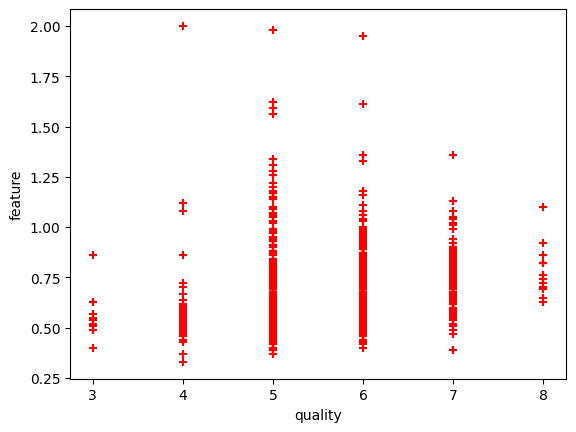

In [613]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('quality')
plt.ylabel('feature')
plt.scatter(df.quality, df['sulphates'], color='red', marker='+')

In [614]:
X = df.drop('quality', axis='columns')
y = df.quality

In [615]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [616]:
x_train.shape

(1279, 11)

In [617]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()

In [618]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=80)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=80)

In [619]:
from sklearn.ensemble import BaggingClassifier
bagging_cls = BaggingClassifier(n_estimators=10)

In [620]:
bagging_cls.fit(x_train, y_train)
bagging_cls.score(x_test, y_test)

0.7

In [621]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(x_train, y_train)

In [622]:
model.score(x_test, y_test)

0.50625